In [67]:
import tensorflow as tf 


In [68]:
! nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-4ce87906-1ff0-b843-456a-4070aa552a1d)


In [69]:
!wget https://raw.githubusercontent.com/Balagopal-datascientist/timeseries_bitcoin/master/BTC_USD_2014-11-03_2021-09-02-CoinDesk.csv

--2021-09-04 10:15:18--  https://raw.githubusercontent.com/Balagopal-datascientist/timeseries_bitcoin/master/BTC_USD_2014-11-03_2021-09-02-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166116 (162K) [text/plain]
Saving to: ‘BTC_USD_2014-11-03_2021-09-02-CoinDesk.csv.2’

BTC_USD_2014-11-03_ 100%[===================>] 162.22K  --.-KB/s    in 0.02s   

2021-09-04 10:15:18 (7.23 MB/s) - ‘BTC_USD_2014-11-03_2021-09-02-CoinDesk.csv.2’ saved [166116/166116]



In [70]:
import pandas as pd 
df = pd.read_csv("/content/BTC_USD_2014-11-03_2021-09-02-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]
                 )
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-03,BTC,331.60083,325.22633,333.75983,319.04350
2014-11-04,BTC,324.71833,331.60083,332.75133,323.06333
2014-11-05,BTC,332.45666,324.71833,335.81166,320.93333
2014-11-06,BTC,336.58500,332.45666,341.49000,328.56166
2014-11-07,BTC,346.77500,336.58500,351.57500,336.02833


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2495 entries, 2014-11-03 to 2021-09-02
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2495 non-null   object 
 1   Closing Price (USD)  2495 non-null   float64
 2   24h Open (USD)       2495 non-null   float64
 3   24h High (USD)       2495 non-null   float64
 4   24h Low (USD)        2495 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.0+ KB


In [72]:
len(df)

2495

In [73]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" : "Price"})

In [74]:
bitcoin_prices.head(),bitcoin_prices.tail()

(                Price
 Date                 
 2014-11-03  331.60083
 2014-11-04  324.71833
 2014-11-05  332.45666
 2014-11-06  336.58500
 2014-11-07  346.77500,                    Price
 Date                    
 2021-08-29  48768.190087
 2021-08-30  49184.208509
 2021-08-31  47663.022501
 2021-09-01  46919.511555
 2021-09-02  48487.011189)

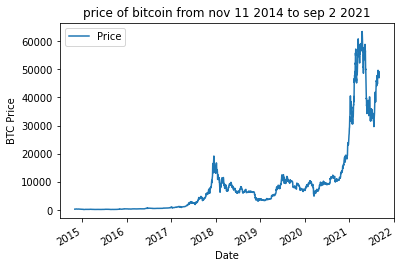

In [75]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("price of bitcoin from nov 11 2014 to sep 2 2021")
plt.legend()

In [76]:
timesteps = bitcoin_prices.index.to_numpy()
prices=bitcoin_prices["Price"].to_numpy()

In [77]:
timesteps,prices

(array(['2014-11-03T00:00:00.000000000', '2014-11-04T00:00:00.000000000',
        '2014-11-05T00:00:00.000000000', ...,
        '2021-08-31T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
        '2021-09-02T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  331.60083   ,   324.71833   ,   332.45666   , ...,
        47663.02250108, 46919.51155472, 48487.01118945]))

In [78]:
split_size = int(0.8 * len(prices))
x_train, y_train = timesteps[:split_size],prices[:split_size]
x_test, y_test = timesteps[split_size:],prices[split_size:]
len(x_train), len(x_test), len(y_train), len(y_test)

(1996, 499, 1996, 499)

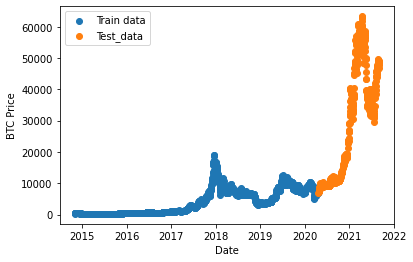

In [79]:
plt.scatter(x_train,y_train,label="Train data")
plt.scatter(x_test,y_test, label = "Test_data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()


In [80]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

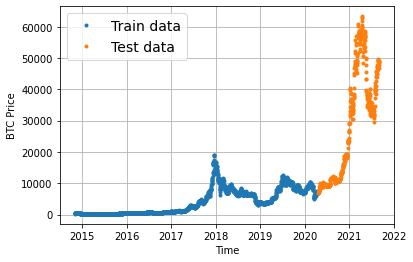

In [81]:
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")

In [82]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([6904.4757727 , 7118.38874792, 7562.03283175, 7497.86176383,
        7542.3034007 , 7624.85378592, 7776.50754257, 7761.75878408,
        8773.10648796, 8767.67262337]),
 array([48971.61189506, 49593.08195852, 48190.95205325, 48907.5327809 ,
        47329.14972025, 49033.32539607, 48768.19008652, 49184.2085095 ,
        47663.02250108, 46919.51155472]))

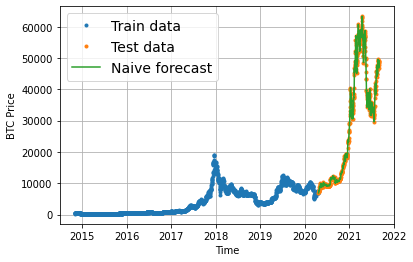

In [83]:
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", label="Naive forecast");

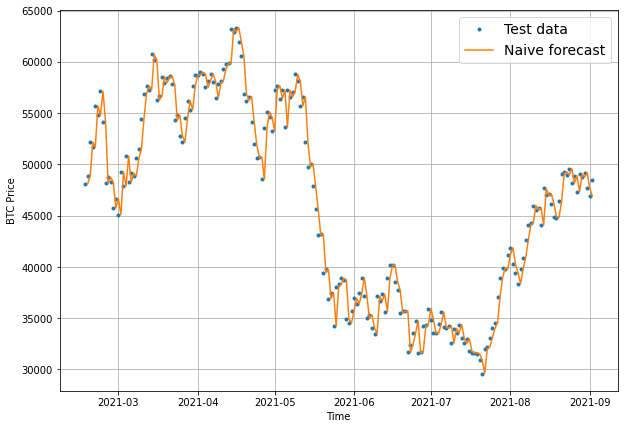

In [84]:
import numpy as np
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [85]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [86]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [87]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 822.6599,
 'mape': 2.6124651,
 'mase': 0.9985134,
 'mse': 1758870.4,
 'rmse': 1326.2241}

In [88]:
tf.reduce_mean(y_test).numpy()

28075.259511212487

In [89]:
#windowing 
HORIZON = 1
WINDOW_SIZE = 7
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [90]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [91]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [92]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2488, 2488)

In [93]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [331.60083 324.71833 332.45666 336.585   346.775   344.81166 343.065  ] -> Label: [358.50166]
Window: [324.71833 332.45666 336.585   346.775   344.81166 343.065   358.50166] -> Label: [368.07666]
Window: [332.45666 336.585   346.775   344.81166 343.065   358.50166 368.07666] -> Label: [376.99666]


In [94]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [95]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1990, 498, 1990, 498)

In [96]:
train_windows[:5], train_labels[:5]

(array([[331.60083, 324.71833, 332.45666, 336.585  , 346.775  , 344.81166,
         343.065  ],
        [324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666],
        [346.775  , 344.81166, 343.065  , 358.50166, 368.07666, 376.99666,
         442.10666]]), array([[358.50166],
        [368.07666],
        [376.99666],
        [442.10666],
        [389.00333]]))

In [97]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [98]:
#model_1 of dense

In [99]:
import tensorflow as tf 
from tensorflow.keras import layers

In [100]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
                          layers.Dense(128, activation = "relu"),
                          layers.Dense(HORIZON, activation = "linear")     
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
16/16 [==============================] - 1s 11ms/step - loss: 1054.5818 - mae: 1054.5818 - val_loss: 3373.1423 - val_mae: 3373.1423
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 339.8134 - mae: 339.8134 - val_loss: 1633.3434 - val_mae: 1633.3434
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 235.6572 - mae: 235.6572 - val_loss: 1608.0294 - val_mae: 1608.0294
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 225.8151 - mae: 225.8151 - val_loss: 1477.3101 - val_mae: 1477.3102
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 220.9485 - mae: 220.9485 - val_loss: 1402.5492 - val_mae: 1402.5

In [101]:
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 825.2902 - mae: 825.2902


[825.2902221679688, 825.2902221679688]

In [102]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 825.2902 - mae: 825.2902


[825.2902221679688, 825.2902221679688]

In [103]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [104]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(498, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([6889.626 , 7092.351 , 7514.9478, 7529.887 , 7557.428 , 7634.2764,
        7795.5854, 7789.9805, 8632.326 , 8834.236 ], dtype=float32)>)

In [105]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 825.2902,
 'mape': 2.6238625,
 'mase': 1.001706,
 'mse': 1780567.8,
 'rmse': 1334.3792}

In [106]:
naive_results

{'mae': 822.6599,
 'mape': 2.6124651,
 'mase': 0.9985134,
 'mse': 1758870.4,
 'rmse': 1326.2241}

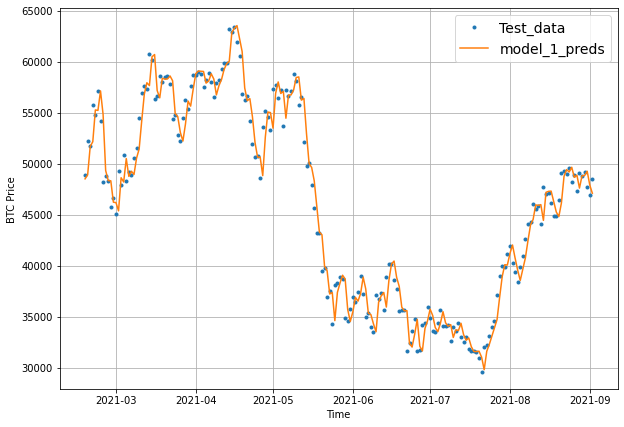

In [108]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [109]:
#model 2
HORIZON= 1
WINDOW_SIZE= 30

In [110]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2465, 2465)

In [111]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1972, 493, 1972, 493)

In [112]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               layers.Dense(128,activation="relu"),
                               layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [113]:
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 929.9203


929.9202880859375

In [114]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 879.0715


879.0714721679688

In [115]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [116]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 879.0715,
 'mape': 2.7892704,
 'mase': 1.0582819,
 'mse': 1948703.5,
 'rmse': 1395.9597}

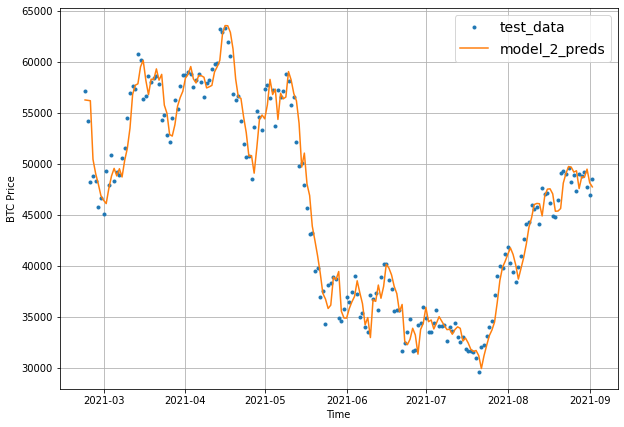

In [118]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [119]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2459, 2459)

In [120]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1967, 492, 1967, 492)

In [121]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [122]:
model_3.evaluate(test_windows, test_labels)

model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 1822.0709


1822.0709228515625

In [123]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[7059.551 , 7044.7812, 7103.5215, 7111.369 , 7094.035 , 6997.258 ,
        7139.809 ],
       [7186.8   , 7174.6953, 7081.4043, 7121.208 , 6987.439 , 7084.419 ,
        7093.006 ],
       [7410.2217, 7409.437 , 7349.311 , 7294.384 , 7261.69  , 7525.9287,
        7251.983 ],
       [7503.0273, 7434.5806, 7468.814 , 7585.2925, 7497.932 , 7620.628 ,
        7496.727 ],
       [7549.2803, 7532.9897, 7499.831 , 7429.9844, 7424.663 , 7501.5137,
        7503.637 ]], dtype=float32)>

In [124]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  476.19742 ,   687.06476 ,   605.87274 ,   641.85364 ,
          868.4046  ,   880.9917  ,   931.42426 ,  1089.6638  ,
          512.78235 ,   308.2404  ,   322.62277 ,   375.45258 ,
          436.02777 ,   442.12875 ,   490.18472 ,   489.863   ,
          634.69586 ,  1044.3654  ,   960.0201  ,   376.05902 ,
          434.34653 ,   718.1727  ,   396.25027 ,   214.59277 ,
          311.06097 ,   260.2486  ,   349.7023  ,   390.17593 ,
          656.20465 ,   645.69324 ,   415.2729  ,   283.7136  ,
          277.13156 ,   283.11664 ,   509.11832 ,   750.98773 ,
          623.8825  ,   422.48227 ,   261.24887 ,   178.77205 ,
          203.48465 ,   312.23257 ,   147.66434 ,   140.58049 ,
          283.32144 ,   208.73186 ,   226.79478 ,   264.12137 ,
          296.48703 ,   434.17426 ,   579.6899  ,   185.64955 ,
          220.4181  ,   159.97893 ,   170.21289 ,   153.26395 ,
          123.86803 ,   173.70131 ,   154.43611 ,   168.98438 ,
          241.98479 ,   223.51408

In [125]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [126]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1822.0707,
 'mape': 5.6859965,
 'mase': 2.2051845,
 'mse': 8961681.0,
 'rmse': 2074.031}

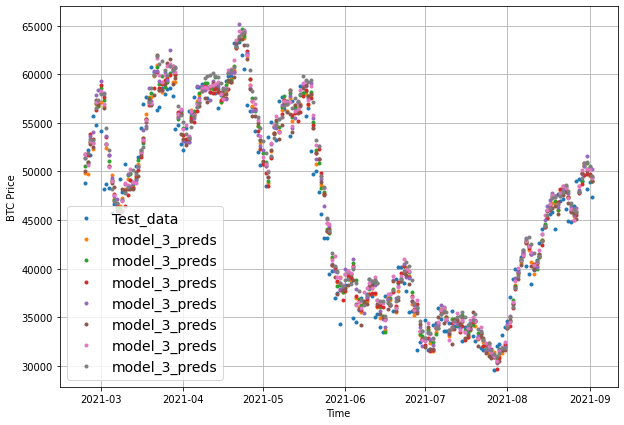

In [128]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

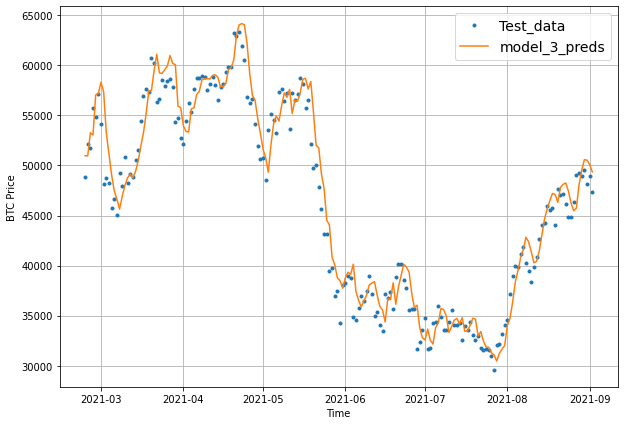

In [131]:

offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=x_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

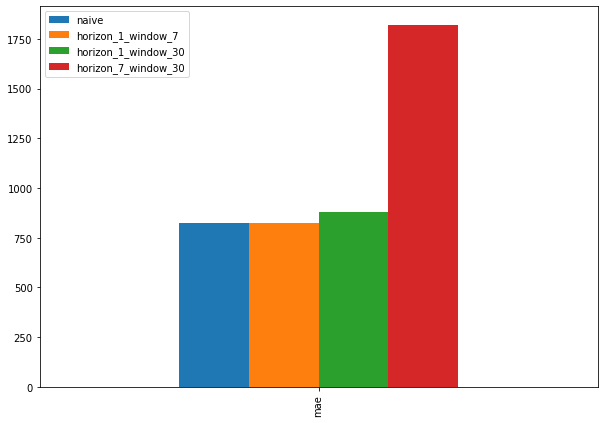

In [132]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [133]:
HORIZON = 1
WINDOW_SIZE = 7

In [134]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2488, 2488)

In [135]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1990, 498, 1990, 498)

In [136]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[331.60083]
 [324.71832]
 [332.45667]
 [336.585  ]
 [346.775  ]
 [344.81165]
 [343.065  ]]


In [139]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
                               layers.Conv1D(filters = 128, kernel_size = 5, padding = "causal",
                                             activation="relu"),
                               layers.Dense(HORIZON)
], name = "model_4_conv1D")


model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [140]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_8 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [141]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 828.2165


828.2164916992188

In [142]:
model_4_preds = make_preds(model_4, test_windows)

In [143]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 828.2165,
 'mape': 2.63659,
 'mase': 1.0052577,
 'mse': 1790195.5,
 'rmse': 1337.9819}

In [144]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets
INFO:tensorflow:Assets written to: model_experiment

In [145]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 878.2834


878.2833862304688

In [146]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results


{'mae': 878.2834,
 'mape': 2.8030622,
 'mase': 1.066027,
 'mse': 1938685.9,
 'rmse': 1392.3671}

In [147]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [148]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(614, 2016)

In [149]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-11-03,331.60083,25
2014-11-04,324.71833,25
2014-11-05,332.45666,25
2014-11-06,336.58500,25
2014-11-07,346.77500,25


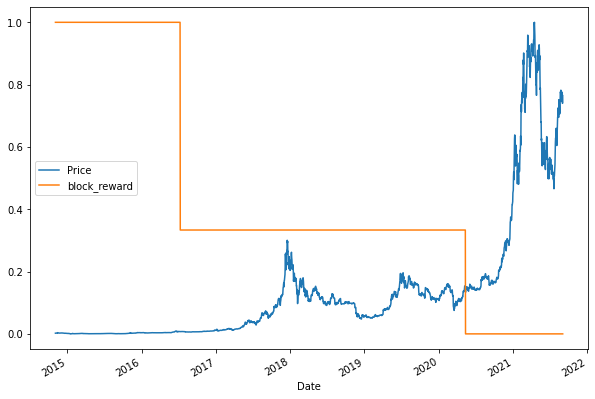

In [150]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [151]:
HORIZON = 1
WINDOW_SIZE = 7

bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-03,331.60083,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-04,324.71833,25,331.60083,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,331.60083,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,331.60083,NaN,NaN,NaN,NaN
2014-11-07,346.77500,25,336.58500,332.45666,324.71833,331.60083,NaN,NaN,NaN
2014-11-08,344.81166,25,346.77500,336.58500,332.45666,324.71833,331.60083,NaN,NaN
2014-11-09,343.06500,25,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083,NaN
2014-11-10,358.50166,25,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833,331.60083
2014-11-11,368.07666,25,358.50166,343.06500,344.81166,346.77500,336.58500,332.45666,324.71833


In [154]:
x = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
x.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-10,25.0,343.065002,344.811646,346.774994,336.584991,332.456665,324.718323,331.600830
2014-11-11,25.0,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665,324.718323
2014-11-12,25.0,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665
2014-11-13,25.0,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991
2014-11-14,25.0,442.106659,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994


In [155]:
split_size = int(len(X) * 0.8)
x_train, y_train = X[:split_size], y[:split_size]
x_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1990, 1990, 498, 498)

In [156]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
INFO:tensorflow:Assets written to: model_ex

In [157]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 822.1695


822.1694946289062

In [158]:
model_6_preds = tf.squeeze(model_6.predict(X_test))

In [159]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 822.16943,
 'mape': 2.617242,
 'mase': 0.99791807,
 'mse': 1768439.9,
 'rmse': 1329.827}

In [160]:
model_1_results

{'mae': 825.2902,
 'mape': 2.6238625,
 'mase': 1.001706,
 'mse': 1780567.8,
 'rmse': 1334.3792}